In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
is_ipython = 'inline' in matplotlib.get_backend()

In [2]:
path = "./Stats_2/" 
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f, header = None) for f in all_files),axis=1)

df = df.T
df = df.rename(columns={0: "Resolution", 1: "Environment Type", 2: "Light Intensity", 3: "Box Bumps", 4: "Wall Bumps", 5: "Loops", 6: "Steps", 7: "Reward", 8: "Threshold"})
df = df.sort_values(["Resolution", "Environment Type", "Light Intensity"], ascending=False)
df = df.replace({"Environment Type": 0}, 'simple')
df = df.replace({"Environment Type": 1}, 'complex')

df = df.reset_index(drop = True)



df_28 = df.drop(df[df.Resolution == 42.0].index)
df_28 = df_28.reset_index(drop = True)

df_42 = df.drop(df[df.Resolution == 28.0].index)

df.head(100)

,Resolution,Environment Type,Light Intensity,Box Bumps,Wall Bumps,Loops,Steps,Reward,Threshold
0,42.0,complex,1.5,2.4,0.0,0.0,640.2,5435.8,0.603255
1,42.0,complex,1.5,4.4,0.4,0.6,645.4,5334.6,0.659393
2,42.0,complex,1.5,3.0,1.0,1.0,652.8,5378.2,0.672434
3,42.0,complex,1.0,6.2,0.2,0.2,640.8,5319.4,0.546765
4,42.0,complex,1.0,4.6,0.8,0.4,646.6,5323.8,0.553896
5,42.0,complex,1.0,7.4,0.2,0.8,646.0,5278.2,0.580758
6,42.0,complex,0.5,9.6,1.6,0.4,641.6,5184.2,0.289673
7,42.0,complex,0.5,9.2,0.2,0.2,650.8,5219.4,0.379860
8,42.0,complex,0.5,7.8,0.2,3.0,700.4,5208.2,0.430258
9,42.0,simple,1.5,3.6,0.4,0.6,643.8,5392.6,0.606112


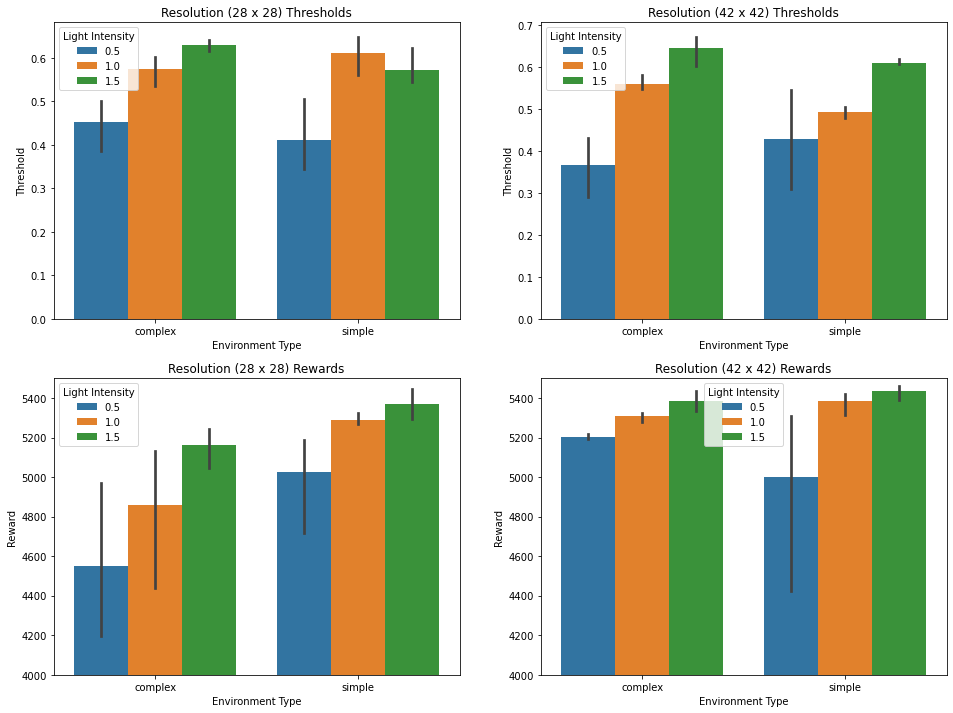

In [3]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0][0].set(title = "Resolution (28 x 28) Thresholds")
sns.barplot(x="Environment Type",y="Threshold",hue="Light Intensity", data=df_28, ax=axs[0][0])
axs[0][1].set(title = "Resolution (42 x 42) Thresholds")
sns.barplot(x="Environment Type",y="Threshold",hue="Light Intensity", data=df_42, ax=axs[0][1])
axs[1][0].set(ylim=(4000,5500), title="Resolution (28 x 28) Rewards")
sns.barplot(x="Environment Type",y="Reward",hue="Light Intensity", data=df_28, ax=axs[1][0])
axs[1][1].set(ylim=(4000,5500), title="Resolution (42 x 42) Rewards")
sns.barplot(x="Environment Type",y="Reward",hue="Light Intensity", data=df_42, ax=axs[1][1])

plt.show()

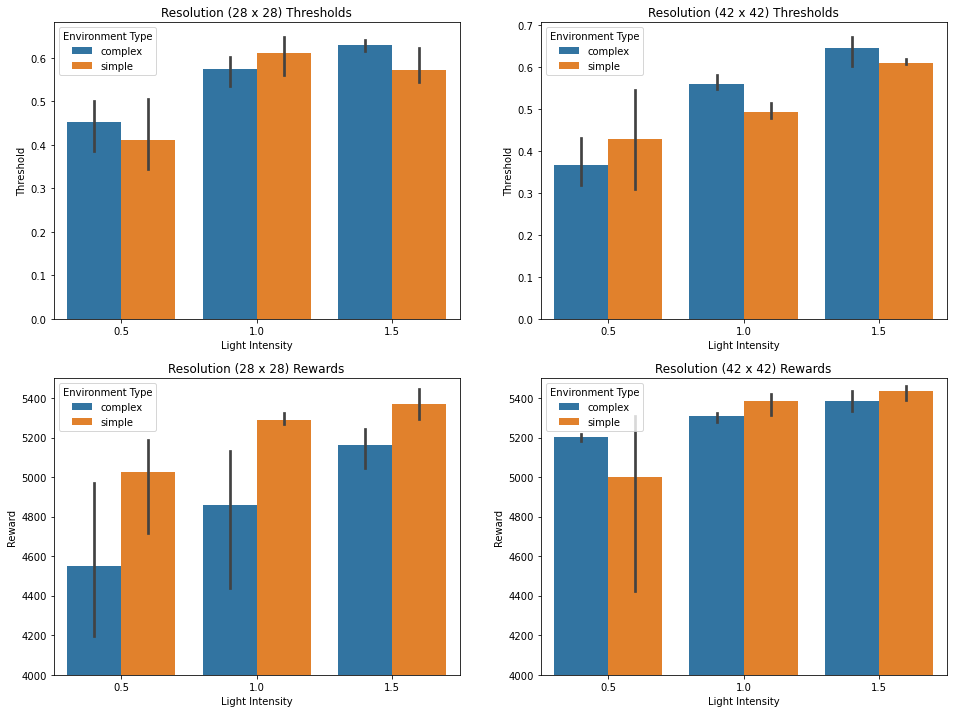

In [4]:
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0][0].set(title = "Resolution (28 x 28) Thresholds")
sns.barplot(x="Light Intensity",y="Threshold",hue="Environment Type", data=df_28, ax=axs[0][0])
axs[0][1].set(title = "Resolution (42 x 42) Thresholds")
sns.barplot(x="Light Intensity",y="Threshold",hue="Environment Type", data=df_42, ax=axs[0][1])
axs[1][0].set(ylim=(4000,5500), title="Resolution (28 x 28) Rewards")
sns.barplot(x="Light Intensity",y="Reward",hue="Environment Type", data=df_28, ax=axs[1][0])
axs[1][1].set(ylim=(4000,5500), title="Resolution (42 x 42) Rewards")
sns.barplot(x="Light Intensity",y="Reward",hue="Environment Type", data=df_42, ax=axs[1][1])

plt.show()